Разработать программу реализующую интегрирование заданной функции методом средних прямоугольников (или иным методом, на выбор) с адаптивной сеткой. Сравнить скорость сходимости данного метода и метода с равномерной сеткой.
*Указание: для выбора "наибольшего" интервала используйте модуль `heapq` из стандартной библиотеки. (При использовании языка `C++`, используйте `std::set`).* 

In [1]:
# import libraries that we need
import numpy as np
import heapq
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# A rectangle is (start, width)
# A list element is (-weight, (start, width))

def make_rect(a, b, f):
    """Make a rectangle for the interval [a, b]"""
    rect = (a, b-a)
    xm = a + rect[1] / 2.
    return (f(xm) * rect[1], rect)
    

def get_max_elem(lst):
    """Find rectangular with max square by heap sort, return this element and remaining list"""
    heapq.heapify(lst)
    
    return lst[-1],lst[:-1]

    
def adapt_rect_list(f, a, b, npts):
    """Integrate f(x) from a to b using npts steps of the adaptive algorithm.
    """
    lst = []
    # start from a single rectangle
    item = make_rect(a, b, f)
    lst.append(item)
    # loop
    for _ in range(npts):
        # get the largest one
        rect, lst = get_max_elem(lst)
        w, (start, width) = rect
                
        # and split it into two halves
        c = start + width / 2.
        
        rect1 = make_rect(start, c, f)
        rect2 = make_rect(c, start + width, f)
        
        lst.append(rect1)
        lst.append(rect2)
    # collect the answer
    return sum(w for w, r in lst), lst

def crect(f, a, b, npts):
    """Calculate the integral by central rectangular integration"""
    h = (b - a) / npts
    summ = 0
    for j in range(npts):
        x = a + h*(j + 0.5)
        summ += f(x)
    return summ * h

In [3]:
def f(x):
    """Define the function that have to be integrated"""
    return (np.exp(-x))
    #return np.exp(-x)*x
"""Define start and end points of integration"""
a, b = 0, 20

def exact(a, b):
    """Define the exact value of integral"""
    return (-np.exp(-b)+np.exp(-a))
    #return (-np.exp(-b)*(b+1)-(-np.exp(-a)*(a+1)))

"""Test the adaptive rectangular algorithm with different numbers of division the mesh"""
for n in (5, 25, 125, 250, 500, 1000, 5000):
    res, lst = adapt_rect_list(f, a, b, n)
    print ('n, res = ', n, res)
print ('Exact value:', exact(a,b))


n, res =  5 0.7921436846593407
n, res =  25 0.9903744105507674
n, res =  125 0.9995254841578629
n, res =  250 0.9997636401049373
n, res =  500 0.9998166847139779
n, res =  1000 0.9998277637078664
n, res =  5000 0.9998400734567691
Exact value: 0.9999999979388464


In [4]:
"""Calculate the time of working of algorithm"""
"""See that by using heap sort the algorithm becomes faster (in lecture we have 128ms)"""
%timeit adapt_rect_list(f, a, b, npts=1000)

75.2 ms ± 4.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


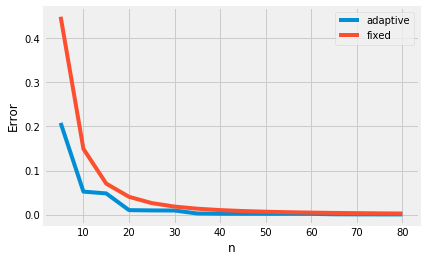

In [5]:
"""Calculate the results of adaptive and fixed mesh algorithms with different n to compare the speed of convergence"""
res1 = []
res2 = []
a, b = 0, 20
npts = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
for k in npts:
    res1.append(abs(adapt_rect_list(f, a, b, k)[0]-exact(a,b)))
    res2.append(abs(crect(f,a,b,k)-exact(a,b)))

plt.figure()
plt.plot(npts,res1,label = 'adaptive')
plt.plot(npts,res2,label = 'fixed')
plt.ylabel('Error')
plt.xlabel('n')
plt.legend()
plt.plot()
plt.show()

### See that the adaptive algorithm converges faster than fixed-mesh algorithm